ADF Statistic: -4.3836060166562065
p-value: 0.0003173029970301731
Data is stationary.
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  104
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1080.144
Date:                Wed, 16 Apr 2025   AIC                          -2148.288
Time:                        11:53:16   BIC                          -2132.480
Sample:                             0   HQIC                         -2141.885
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0608   2.47e-18  -2.46e+16      0.000      -0.061      -0.061
ar.L2          0.1606   2.33e-18   6.89e+16  

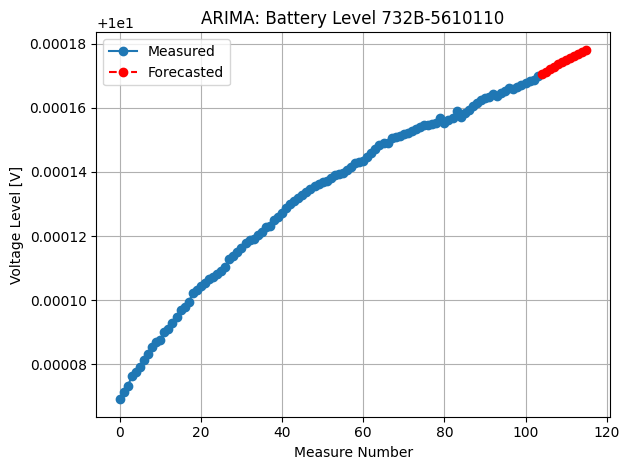

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import loadtxt
import numpy as np
import matplotlib.pyplot as plt

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

# load the dataset
dataset = loadtxt('110data2.csv', usecols=[1], delimiter=',')
#print(dataset)

# Check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary.")
    else:
        print("Data is not stationary. Differencing needed.")

check_stationarity(dataset)

# Fit ARIMA model
model = ARIMA(dataset, order=(5,1,0))  # (p,d,q) with differencing d=1
model_fit = model.fit()

# Forecast next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Create x-axis indexes for measured & forecasted data
x_measured = np.arange(len(dataset))
x_forecast = np.arange(len(dataset), len(dataset) + forecast_steps)

# evaluate forecasts
print(model_fit.summary())
#print("Forecasted Values:")
#print(forecast)
print()
a = dataset.shape[0]
for idx, i in enumerate(range(forecast_steps)):
    print(f"Forecasted Measure Number = {i + a}, prediction is {forecast[idx]:.8f} V")
    
print()

# Save figure
#fig, ax = plt.subplots()
#plt.plot(figsize=(10,5))
plt.plot(x_measured, dataset, label='Measured', marker='o', linestyle='-')
plt.plot(x_forecast, forecast, label='Forecasted', marker='o', linestyle='--', color='red')
plt.legend()
plt.title('ARIMA Forecast: Battery Level 732B-5610110')
plt.ylabel('Voltage Level [V]')
plt.xlabel('Measure Number')
plt.tight_layout()
plt.grid()
plt.show()

# Save the figure object
#with open("110.fig", "wb") as f:
 #   pickle.dump(fig, f)
#plt.savefig("110.png")  # PNG format
#plt.savefig("110.pdf")  # PDF format


In [5]:
for idx, i in enumerate(range(forecast_steps)):
    print(f"{forecast[idx]:.8f} V")

10.00017064 V
10.00017136 V
10.00017215 V
10.00017293 V
10.00017363 V
10.00017431 V
10.00017500 V
10.00017568 V
10.00017632 V
10.00017694 V
10.00017756 V
10.00017816 V
